In [111]:
#importiamo la liberia che permette di navigare sulle cartelle del PC
import os

#importo la libreria statistica pandas
import pandas as pd


#importo le librerie di visualizzazione dei grafici
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#importo la libreria time per rallentare il processo e permettere la visualizzazione delle note
import time 



In [112]:
#carichiamo il programma in memoria per selezionare il dominio ed estrarre i 


def seleziona_dominio(selezione = False):
    '''
    restituisce un oggetto con dentro tutti i dataset del singolo dominio
    è possibile accedere al dataset con
    risultato[codice rappresentativo del dataset]
    il codice rappresentativo del dataset è individuabile in nota
    
    '''
    print("seleziona il dominio BES da esplorare - indica il codice a due cifre (es, salute = 01):")
    lista_domini = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016'))
    dizionario_per_selezione = {}
    for dominio in lista_domini:
        print(dominio)
        dizionario_per_selezione[dominio[0:2]] = dominio
    print("------------------------------------------------------------")
    print("inserisci il codice preselto")    
    if selezione == False:
        a = raw_input()
    else:
        a = str(selezione)
    print("selezionato " + a)
    print("------------------------------------------------------------")
    
    dataset_presenti_dominio = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a]))    
    print("""
    xxxxxx--------------------------------------------xxxxxx
    --------------------------
    ------------
    
    
    
    NOTA DI SEGUITO TROVERETE UNA SEQUENZA DI STRINGHE CHE RAPPRESENTANO I DIVERSI DATASET E IL CODICE CON CUI LO POTRETE RICHIAMARE
    il primo a numero a sinistra, prima della prima virgola, rappresenta il codice con cui richiamare successivamente il dataset
    esempio 1
    (0, u'Regione ', u'Tavola 1.1 - Posti letto nei presidi residenziali socio-assistenziali e socio-sanitari per regione  e ripartizione ')
    per richiamare questo dataset scrivere nella successiva cella dataset_dominio[0]
    
    
    esempio 2
    Cap_02_Istruzione 07.xlsx
    (14, u'REG Maschi-Femmine', u"Tavola 7.1 - Persone di 25-64 anni che hanno partecipato ad attivit\xe0 di istruzione e formazione nelle 4 settimane precedenti l'intervista per sesso,")
    per richiamare questo dataset scrivere nella successiva cella dataset_dominio[14]
    
    ------------
    --------------------------
    xxxxxx--------------------------------------------xxxxxx
    """)
    
    time.sleep(5)
    
    print("ecco la lista dei dataset presenti:")
    print("------------------------------------")
    
    
    
    
    repo_dataset = {}
    nsheet = 0
    for dataset in dataset_presenti_dominio:
        
        print("------------------------------------------------------------")
        print(dataset)
        if dataset[-4:] == "xlsx":
            posizione_del_file = os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a], dataset)
            sheets= pd.read_excel(posizione_del_file, sheetname = None)
            for sheet in sheets.keys():
                try:
                    print(nsheet, sheet, sheets[sheet].iloc[1,0] + " " + sheets[sheet].iloc[2,0] )
                    repo_dataset[nsheet] = sheets[sheet]
                    nsheet += 1
                    print("-------------------------")
                except:
                    print("errore", nsheet, sheet)
                    nsheet += 1
    
    return repo_dataset

In [113]:
dataset_dominio = seleziona_dominio()

seleziona il dominio BES da esplorare - indica il codice a due cifre (es, salute = 01):
01.Salute
02.Istruzione
03.Lavoro
04.Benessere economico
05.Relazioni sociali
06.Politica e istituzioni
07.Sicurezza
08.Benessere soggettivo
09.Paesaggio e patrimonio culturale
10.Ambiente
11.Ricerca e innovazione
12.Qualit� dei servizi
------------------------------------------------------------
inserisci il codice preselto
12
selezionato 12
------------------------------------------------------------

    xxxxxx--------------------------------------------xxxxxx
    --------------------------
    ------------
    
    
    
    NOTA DI SEGUITO TROVERETE UNA SEQUENZA DI STRINGHE CHE RAPPRESENTANO I DIVERSI DATASET E IL CODICE CON CUI LO POTRETE RICHIAMARE
    il primo a numero a sinistra, prima della prima virgola, rappresenta il codice con cui richiamare successivamente il dataset
    esempio 1
    (0, u'Regione ', u'Tavola 1.1 - Posti letto nei presidi residenziali socio-assistenziali e socio-sani

In [114]:
# a titolo di esempio seleziono il dataset codice 12 del dominio 12.Qualità dei servizi
# u'Tavola 11.1 - Famiglie che dichiarano molta difficolt\xe0 a raggiungere almeno 3 servizi essenziali (a)
esempio = dataset_dominio[3].copy()

In [115]:
#il dataset non è formattato correttamente per analisi statistiche..
esempio

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tavola 4.1 - Frequenza delle interruzioni acci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,- Anni 2004-2015 (numero ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REGIONI E \nRIPARTIZIONI\nGEOGRAFICHE,2004.00,2005.00,2006.00,2007.00,2008.00,2009.00,2010.000000,2011.00,2012.00,2013.00,2014.00,2015
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Piemonte,2.32,1.80,1.79,1.35,2.35,1.74,1.460000,1.52,1.45,1.37,1.49,1.66
8,Valle d'Aosta/Vallée d'Aoste,1.01,0.81,1.18,0.76,1.94,1.51,1.070000,0.83,0.99,0.83,0.83,1.21
9,Liguria,1.67,1.56,2.23,1.44,2.16,1.92,1.800000,1.55,1.33,1.62,1.64,1.67


In [116]:
#... quindi lo riportiamo in forma normale 

#1) la riga 4 contiene l'intestazione di colonna e la mettiamo come tale con questa operazione
esempio.columns = esempio.iloc[4]

#2) eliminiamo la riga 4 che ormai è superflua
esempio.drop(4, inplace = True)

In [117]:
#elimino i restanti dati superflui per il calcolo
esempio.dropna(inplace = True)
esempio

4,REGIONI E RIPARTIZIONI GEOGRAFICHE,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015
7,Piemonte,2.32,1.80,1.79,1.35,2.35,1.74,1.460000,1.52,1.45,1.37,1.49,1.66
8,Valle d'Aosta/Vallée d'Aoste,1.01,0.81,1.18,0.76,1.94,1.51,1.070000,0.83,0.99,0.83,0.83,1.21
9,Liguria,1.67,1.56,2.23,1.44,2.16,1.92,1.800000,1.55,1.33,1.62,1.64,1.67
10,Lombardia,1.30,1.25,1.24,1.07,1.35,1.12,1.100000,1.01,1.05,1.11,1.13,1.24
11,Trentino-Alto Adige/Südtirol,2.79,1.84,1.82,1.98,3.56,1.89,1.730000,1.33,1.46,1.73,1.75,1.32
12,Bolzano/Bozen,2.27,1.66,2.04,1.90,2.91,2.18,1.500000,1.75,1.76,1.86,1.80,n.d.
13,Trento,3.12,1.94,1.58,2.09,3.95,1.68,1.890000,1.01,1.24,1.63,1.72,n.d.
14,Veneto,2.23,1.55,1.68,1.45,1.75,1.54,1.710000,1.17,1.44,1.56,1.75,1.36
15,Friuli-Venezia Giulia,1.76,0.92,1.01,0.89,1.34,1.03,0.950000,0.86,0.75,0.86,1.22,0.97
16,Emilia-Romagna,1.84,1.42,1.32,1.05,1.10,1.19,1.310000,1.00,1.21,1.38,1.06,1.9


In [118]:
#inserisco la regione come indice e non come dato


c:\Users\SANTECH\Anaconda\lib\site-packages\pandas\indexes\base.py:933: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.is_unique


In [119]:
esempio.set_index(esempio.columns[0], inplace = True)

In [120]:
# numero indice base 100 

In [121]:
esempio.divide(esempio[esempio.columns[0]], axis = 0) * 100
# bug identificato, per compiere questa operazione i valori dell'intestazione colonna devono essere tutti dello stesso tipo

4,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
REGIONI E RIPARTIZIONI GEOGRAFICHE,,,,,,,,,,,
Piemonte,100.0,77.586207,77.155172,58.189655,101.293103,75.000000,62.931034,65.517241,62.500000,59.051724,64.224138
Valle d'Aosta/Vallée d'Aoste,100.0,80.198020,116.831683,75.247525,192.079208,149.504950,105.940594,82.178218,98.019802,82.178218,82.178218
Liguria,100.0,93.413174,133.532934,86.227545,129.341317,114.970060,107.784431,92.814371,79.640719,97.005988,98.203593
Lombardia,100.0,96.153846,95.384615,82.307692,103.846154,86.153846,84.615385,77.692308,80.769231,85.384615,86.923077
Trentino-Alto Adige/Südtirol,100.0,65.949821,65.232975,70.967742,127.598566,67.741935,62.007168,47.670251,52.329749,62.007168,62.724014
Bolzano/Bozen,100.0,73.127753,89.867841,83.700441,128.193833,96.035242,66.079295,77.092511,77.533040,81.938326,79.295154
Trento,100.0,62.179487,50.641026,66.987179,126.602564,53.846154,60.576923,32.371795,39.743590,52.243590,55.128205
Veneto,100.0,69.506726,75.336323,65.022422,78.475336,69.058296,76.681614,52.466368,64.573991,69.955157,78.475336
Friuli-Venezia Giulia,100.0,52.272727,57.386364,50.568182,76.136364,58.522727,53.977273,48.863636,42.613636,48.863636,69.318182


In [122]:
esempio_numero_indice = esempio.divide(esempio[esempio.columns[0]], axis = 0) * 100
esempio_numero_indice

4,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
REGIONI E RIPARTIZIONI GEOGRAFICHE,,,,,,,,,,,
Piemonte,100.0,77.586207,77.155172,58.189655,101.293103,75.000000,62.931034,65.517241,62.500000,59.051724,64.224138
Valle d'Aosta/Vallée d'Aoste,100.0,80.198020,116.831683,75.247525,192.079208,149.504950,105.940594,82.178218,98.019802,82.178218,82.178218
Liguria,100.0,93.413174,133.532934,86.227545,129.341317,114.970060,107.784431,92.814371,79.640719,97.005988,98.203593
Lombardia,100.0,96.153846,95.384615,82.307692,103.846154,86.153846,84.615385,77.692308,80.769231,85.384615,86.923077
Trentino-Alto Adige/Südtirol,100.0,65.949821,65.232975,70.967742,127.598566,67.741935,62.007168,47.670251,52.329749,62.007168,62.724014
Bolzano/Bozen,100.0,73.127753,89.867841,83.700441,128.193833,96.035242,66.079295,77.092511,77.533040,81.938326,79.295154
Trento,100.0,62.179487,50.641026,66.987179,126.602564,53.846154,60.576923,32.371795,39.743590,52.243590,55.128205
Veneto,100.0,69.506726,75.336323,65.022422,78.475336,69.058296,76.681614,52.466368,64.573991,69.955157,78.475336
Friuli-Venezia Giulia,100.0,52.272727,57.386364,50.568182,76.136364,58.522727,53.977273,48.863636,42.613636,48.863636,69.318182


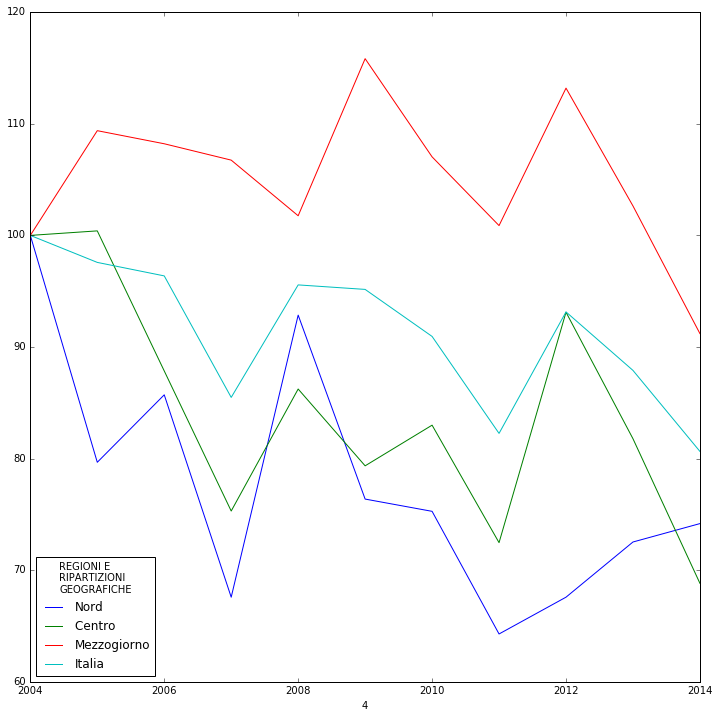

In [123]:
esempio_numero_indice.loc[["Nord", "Centro ", "Mezzogiorno", "Italia"]].T.plot(figsize = (12,12))

In [ ]:
#funzione alternativa 

def seleziona_dataset():
    '''questa funzione permette di accedere al singolo dataset seguendo una procedura guidata'''
    print("seleziona il dominio BES da esplorare - indica il codice a due cifre (es, salute = 01):")
    lista_domini = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016'))
    dizionario_per_selezione = {}
    for dominio in lista_domini:
        print(dominio)
        dizionario_per_selezione[dominio[0:2]] = dominio
    print(" ")
    print("inserisci il codice preselto")    
    a = raw_input()
    print("selezionato " + a)
    print(" ")
    
    dataset_presenti_dominio = os.listdir(os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a]))    
    print("ecco la lista dei dataset presenti")
    for dataset in enumerate(dataset_presenti_dominio):
        print(str(dataset[0]) + " " + dataset[1])
    print(" ")
    print("seleziona il dataset, utilizzando il codice ad inizio riga (es, Cap_10_Ambiente 01.xlsx = 0)")
    b = raw_input()
    posizione_del_file = os.path.join(os.getcwd(), 'Appendice-statistica-2016', dizionario_per_selezione[a], dataset_presenti_dominio[int(b)])
    return pd.read_excel(posizione_del_file, sheetname = None)